In [128]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [127]:
df = pd.read_csv('Advertising.csv')
     

In [69]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [70]:
df.shape

(200, 5)

In [71]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [73]:

df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [74]:

df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

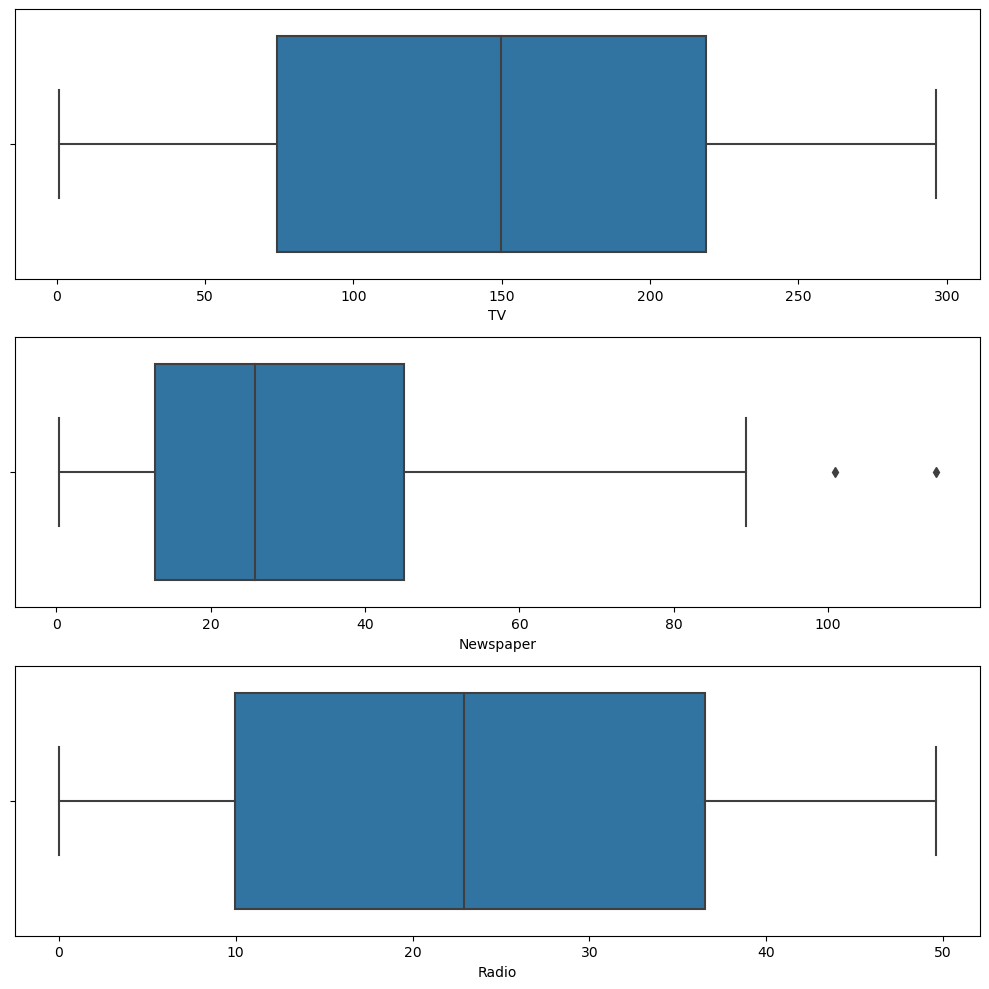

In [76]:
fig, axs = plt.subplots(3, figsize = (10,10))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

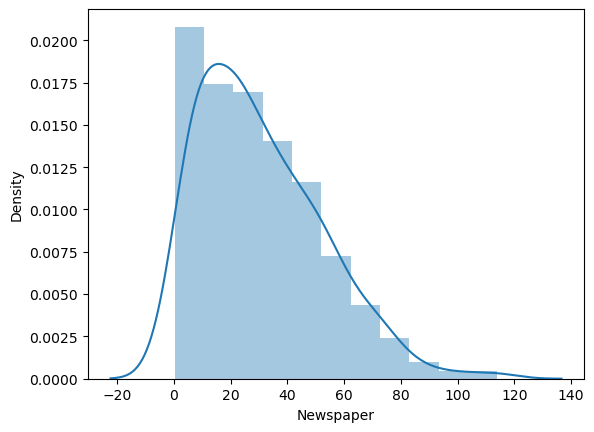

In [77]:
sns.distplot(df['Newspaper'])
     

In [78]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [79]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [80]:
data = df.copy()

In [81]:
data.loc[data['Newspaper']>=98, 'Newspaper']=98

<AxesSubplot:xlabel='Newspaper'>

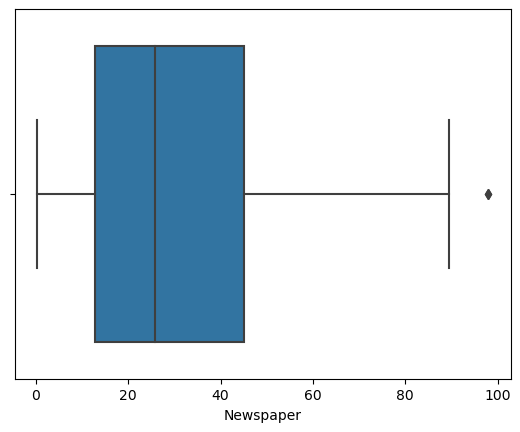

In [82]:
sns.boxplot(data['Newspaper'])
     

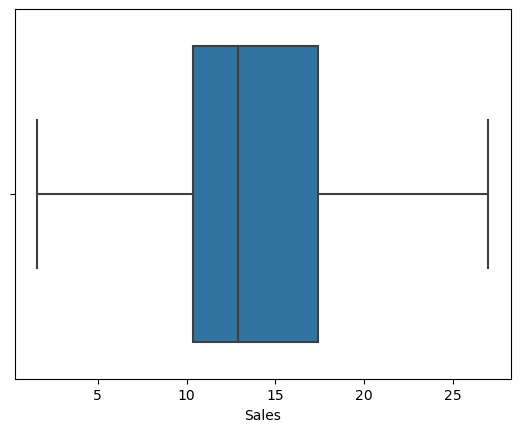

In [83]:
sns.boxplot(data['Sales']);

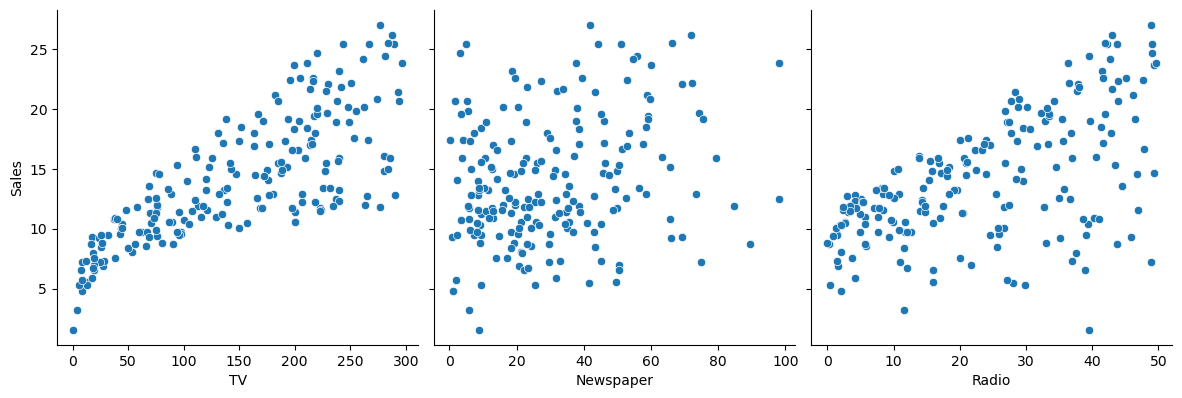

In [84]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()
     

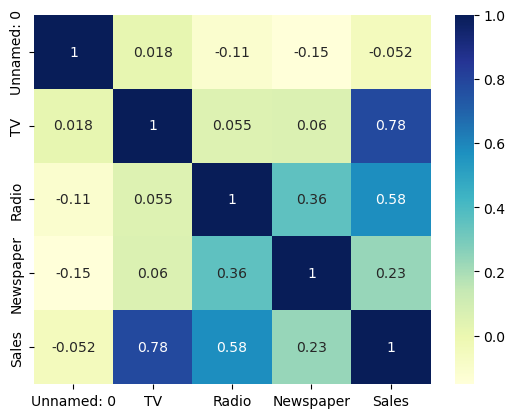

In [85]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [86]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [87]:
print(important_features)

['TV', 'Radio', 'Sales']


In [88]:
X = data['TV']
y = data['Sales']
     


In [89]:
X = X.values.reshape(-1,1)

In [90]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [91]:

y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [92]:
print(X.shape,y.shape)

(200, 1) (200,)


In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [94]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [95]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [96]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn
     

KNeighborsRegressor()

In [97]:
knn_train_pred = knn.predict(X_train)

In [98]:
knn_test_pred = knn.predict(X_test)
     



In [99]:
print(knn_train_pred, knn_test_pred)

[13.96 10.28 13.24 10.66 10.5  13.44 18.3  14.58 14.12  6.1   9.84 17.52
 19.34 19.76 19.54 14.74 11.84  7.72 20.38 10.9  12.36 16.22  9.26  4.16
  4.16 20.38 19.88 20.84  8.26 16.74 14.06  9.62  9.4  13.74 13.52 16.32
  6.1   9.26 18.92 16.06 20.2  20.2  14.1  13.4  17.52  6.06 15.56 19.86
 15.08 13.26 19.86 17.54 17.54 14.6  19.28 13.8  18.3  20.82  9.98  7.72
 18.9  15.8  13.66  8.26 16.32  9.98  9.84 13.4   8.26 11.22 16.32 16.22
 10.66 17.52 13.28 19.14 12.36 13.28 11.62  8.26 17.54  6.1  16.06 10.28
 19.28 11.22 13.4  20.2  17.54 16.06  9.98 11.62 15.32  9.62  9.98 12.36
  9.84 11.22  8.26 14.5  19.34 14.12 14.12 11.22  7.72 16.26 14.74 15.56
  7.3   7.72  7.72  9.98 13.74 10.28  5.28 13.4  14.06 13.84 14.2  19.28
 13.26 15.32 18.92 16.2  14.46 13.06 16.2  13.06 17.54 16.1  15.8  17.5
 16.2  13.24] [14.12 15.32  9.7  16.32 14.3   5.28 15.08 20.2  15.56 14.2   5.28 13.6
 11.62  7.72 10.52 15.92  7.3  10.12 15.56 19.54 16.22  9.84  9.78 13.24
 15.56 16.08 20.84 20.2  15.68 16.66 15

In [100]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [101]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5599102948195085
RMSE: 3.662590571845248


In [102]:
Results.head()


,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.672395,0.55991,3.662591,0.112485


In [103]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [104]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [105]:
print(svr_train_pred,svr_test_pred)

[14.9518619   9.99777247 12.52281901 10.14798818 11.20551977 14.83236622
 17.10372799 17.32130476 13.37924581  7.67798052  9.79995749 17.17121447
 17.54671534 17.03548063 16.82203557 13.69955295 10.3736957   7.88200439
 17.59177995 10.23042028 10.5255544  17.37461877  8.5980482   7.62918392
  7.61231875 17.59084364 17.04943193 17.06090684  8.20100136 17.49934618
 12.97455921  8.89277007  9.48263143 13.89771848 12.10747806 15.59959161
  7.67390203  8.58907273 17.14920554 17.53857208 16.44337318 16.57875989
 14.1445566  12.06901743 17.22843468  7.72549237 16.23919933 16.94741359
 16.77684248 12.33257986 16.9294903  17.37669422 17.34673128 13.1968946
 16.97455246 12.90135717 17.10704004 17.16241177 11.53089309  7.83588543
 17.08027352 16.54143411 13.27207381  8.07635581 15.4798961  11.44958541
  9.0797701  12.06901743  8.07297526 11.05461224 15.3858733  17.35586253
 10.15831175 17.22843468 13.42428006 16.72890694 10.61573622 13.49682117
 10.43972763  8.09341328 17.43314714  7.6766073  17.

In [106]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5410722112829505
RMSE: 3.7401579759523305


In [107]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.672395,0.559910,3.662591,0.112485
1,Support Vector Machine,0.576712,0.541072,3.740158,0.035640


In [108]:
import statsmodels.api as sm

In [109]:


X_train_constant = sm.add_constant(X_train)
     

In [110]:
model = sm.OLS(y_train, X_train_constant).fit()

In [111]:

model.params

const    7.001113
x1       0.045613
dtype: float64

In [112]:
print(model.summary())
     

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     201.8
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           2.28e-28
Time:                        20:46:41   Log-Likelihood:                -343.65
No. Observations:                 134   AIC:                             691.3
Df Residuals:                     132   BIC:                             697.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0011      0.542     12.906      0.0

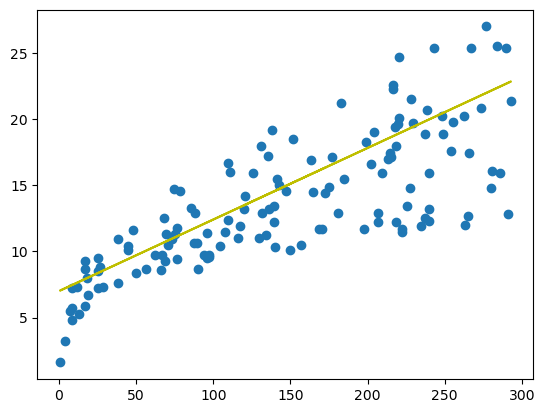

In [113]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [114]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

160   -0.469391
10    -1.416146
77     1.702495
65    -0.848425
107   -2.424547
         ...   
41     2.025349
40     0.362212
147    7.305755
146   -4.752844
7      0.716179
Name: Sales, Length: 134, dtype: float64

In [115]:
y_train_pred

array([14.86939137, 10.01614622, 12.49750464, 10.14842452, 11.12454713,
       14.764481  , 16.96303754, 17.30057527, 13.40064613,  7.39794817,
        9.84281603, 17.05882528, 18.65072618, 16.87181113, 19.9370186 ,
       13.71993857, 10.34912262,  7.85408024, 18.33143373, 10.22140565,
       10.48596224, 17.40092432,  8.74353776,  7.18812742,  7.03304252,
       18.34967902, 16.89005641, 19.63141011,  8.30565098, 17.69741017,
       12.98100463,  9.03090096,  9.56457547, 13.91151404, 12.05049522,
       15.43499513,  7.38426421,  8.73441512, 17.02689603, 17.82968846,
       20.36122142, 20.21525916, 14.14414139, 12.00944333, 17.14549037,
        7.53478779, 16.01428285, 19.7819337 , 16.56164133, 12.29224521,
       19.8047403 , 19.11598088, 19.17527805, 13.21363198, 16.79426868,
       12.90346218, 16.96759886, 19.48544785, 11.4484009 ,  7.77197646,
       16.9311083 , 16.31076869, 13.29117443,  8.14600476, 15.33008476,
       11.36629712,  9.20423114, 12.00944333,  8.14144344, 10.97

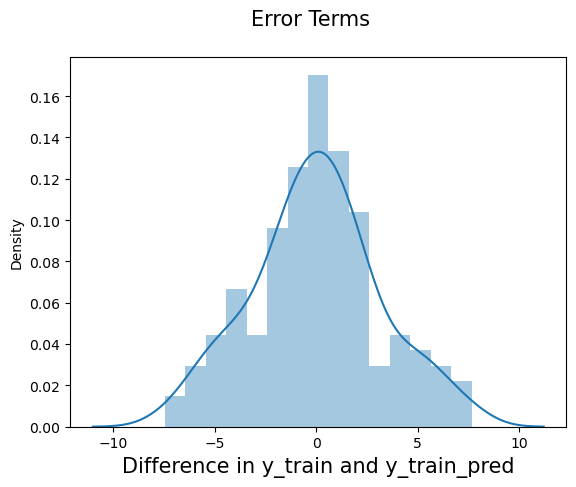

In [116]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

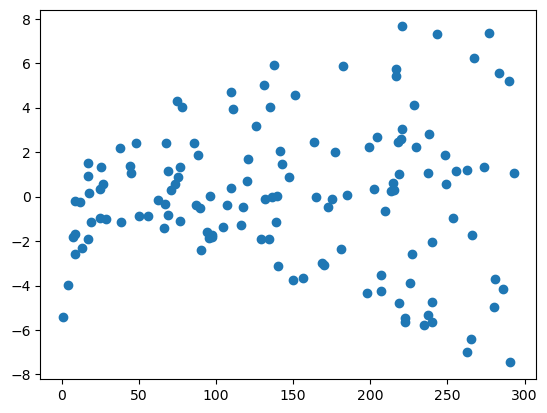

In [117]:
plt.scatter(X_train, res)
plt.show()
     

In [118]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [119]:
X_test_constant

array([[  1. , 139.5],
       [  1. , 205. ],
       [  1. ,  53.5],
       [  1. , 184.9],
       [  1. , 224. ],
       [  1. ,   5.4],
       [  1. , 210.8],
       [  1. , 287.6],
       [  1. , 199.8],
       [  1. , 175.7],
       [  1. ,   7.8],
       [  1. , 112.9],
       [  1. ,  75.5],
       [  1. ,  19.4],
       [  1. , 102.7],
       [  1. , 188.4],
       [  1. ,  13.2],
       [  1. , 100.4],
       [  1. , 198.9],
       [  1. , 284.3],
       [  1. , 193.7],
       [  1. ,  59.6],
       [  1. ,  93.9],
       [  1. , 121. ],
       [  1. , 197.6],
       [  1. , 232.1],
       [  1. , 276.7],
       [  1. , 296.4],
       [  1. , 187.9],
       [  1. , 193.2],
       [  1. , 210.7],
       [  1. , 187.8],
       [  1. ,  80.2],
       [  1. ,  57.5],
       [  1. ,  18.8],
       [  1. , 250.9],
       [  1. ,  75.1],
       [  1. ,  19.6],
       [  1. , 191.1],
       [  1. ,  39.5],
       [  1. ,  68.4],
       [  1. ,  31.5],
       [  1. , 149.7],
       [  1

In [120]:
y_pred

array([13.36415556, 16.35182058,  9.44141982, 15.43499513, 17.2184715 ,
        7.24742459, 16.61637717, 20.11947142, 16.1146319 , 15.01535363,
        7.35689629, 12.15084427, 10.44491036,  7.88600948, 11.68558957,
       15.59464135,  7.6032076 , 11.58067919, 16.07358002, 19.96894784,
       15.83639135,  9.71966038, 11.28419335, 12.52031125, 16.01428285,
       17.58793847, 19.62228747, 20.52086764, 15.57183475, 15.81358474,
       16.61181585, 15.56727343, 10.65929243,  9.62387264,  7.85864156,
       18.44546675, 10.42666507,  7.89513212, 15.71779701,  8.80283493,
       10.12105659,  8.43792928, 13.82941027, 17.94372148, 10.48140092,
       15.0746508 ,  8.96704247, 16.1146319 , 12.61609898, 20.39315066,
       19.83666954, 14.6093961 , 16.73953283, 17.41460829,  8.96248115,
       15.9139338 , 14.45887251, 18.02582525,  8.08670759, 18.9198441 ,
       14.55466025, 17.91635356,  8.68424059, 14.81465552, 17.49671206,
        8.25547645])

In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [122]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.487592187955355

In [123]:
r2 = r2_score(y_test, y_pred)


In [124]:

r2

0.6009605294503089

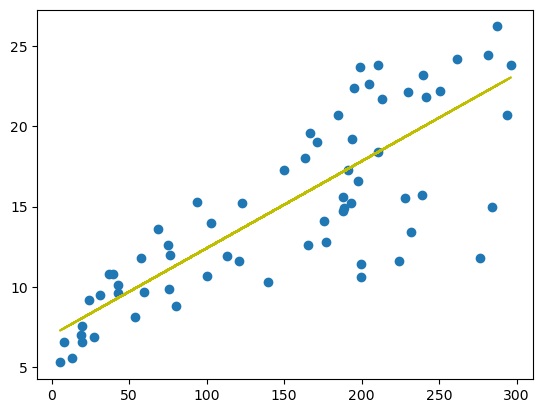

In [125]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()